<a href="https://colab.research.google.com/github/asthabaj/Complete-Python-3-Bootcamp/blob/master/imgclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms as transform
from google.colab import files
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, ConcatDataset, TensorDataset
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)
import seaborn as sns
from PIL import Image

In [2]:
from torchvision.utils import save_image

In [3]:
print("GPU Available:", torch.cuda.is_available())
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

GPU Available: True


In [4]:
#dataset=torchvision.datasets.CIFAR10(root='/content/drive/MyDrive', train=True, download=True, transform=transform)

In [8]:
#data augmentation par
transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),       #4 padding crop
    transforms.RandomHorizontalFlip(p=0.5),               #rotatie omg
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # adjust colors
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])


In [9]:
# Load the dataset without downloading
train_data = torchvision.datasets.CIFAR10(root='/content/drive/MyDrive', train=True, download=True, transform=transform)
test_data = torchvision.datasets.CIFAR10(root='/content/drive/MyDrive', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [10]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=False)

In [11]:
#print(f"Number of training images: {len(train_dataset)}")


In [12]:
#model validation-one training data
oneimg, onelabel = train_data[0]
oneimg = oneimg.unsqueeze(0).to(device)
onelabel = torch.tensor([onelabel]).to(device)

In [ ]:
oneimgdataset = TensorDataset(oneimg, onelabel)
oneimgloader = DataLoader(oneimgdataset, batch_size=1)

In [34]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# # Helper function to denormalize and display images
# def imshow(img):
#     img = img / 2 + 0.5  # Denormalize
#     np_img = img.numpy()
#     plt.imshow(np.transpose(np_img, (1, 2, 0)))
#     plt.show()



In [ ]:
# # Get a batch of training data
# data_iter = iter(train_loader)
# images, labels = next(data_iter)

In [ ]:
# Show images
# imshow(torchvision.utils.make_grid(images[:20]))  # Display first 20 images

In [43]:
num_classes = 10
class neunet(nn.Module):
    def __init__(self, num_classes=10):
        super(neunet, self).__init__()

        # U-Net Encoder (Downsampling path)
        self.enc1 = self.conv_block(3, 64)
        self.enc2 = self.conv_block(64, 128)
        self.enc3 = self.conv_block(128, 256)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        #conv_block is helper method that applies two convolution layers with relu activation.

        self.bottleneck = self.conv_block(256, 512)
        #bootleneck most compressed version of img, high lvl abst features(global)
        # can help extract high-level features but decoder classiciton ma chaidaina
        self.fc = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Flatten(),
            nn.Linear(512, num_classes) #512featre from bottlenck bacj to 10 classes
        )

    def conv_block(self, in_channels, out_channels):
        return nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        x = self.pool(self.enc1(x))
        x = self.pool(self.enc2(x))
        x = self.pool(self.enc3(x))
        x = self.bottleneck(x)
        x = self.fc(x)  # convert to class predictions 10 ma eyta
        return x

In [44]:

model = neunet(num_classes=num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)


In [15]:
for epoch in range(50):
    model.train()
    print(f'Training epoch {epoch}..')
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs) #fwd pass
        loss = criterion(outputs, labels)
        loss.backward() #back propagation
        optimizer.step() #model eight update
        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    print(f"Loss: {avg_loss:.4f}")

Training epoch 0..
Loss: 1.8927
Training epoch 1..
Loss: 1.5820
Training epoch 2..
Loss: 1.4216
Training epoch 3..
Loss: 1.2673
Training epoch 4..
Loss: 1.1567
Training epoch 5..
Loss: 1.0670
Training epoch 6..
Loss: 0.9901
Training epoch 7..
Loss: 0.9338
Training epoch 8..
Loss: 0.8709
Training epoch 9..
Loss: 0.8304
Training epoch 10..
Loss: 0.7761
Training epoch 11..
Loss: 0.7375
Training epoch 12..
Loss: 0.6949
Training epoch 13..
Loss: 0.6580
Training epoch 14..
Loss: 0.6244
Training epoch 15..
Loss: 0.6014
Training epoch 16..
Loss: 0.5685
Training epoch 17..
Loss: 0.5422
Training epoch 18..
Loss: 0.5209
Training epoch 19..
Loss: 0.4998
Training epoch 20..
Loss: 0.4810
Training epoch 21..
Loss: 0.4622
Training epoch 22..
Loss: 0.4408
Training epoch 23..
Loss: 0.4287
Training epoch 24..
Loss: 0.4120
Training epoch 25..
Loss: 0.3940
Training epoch 26..
Loss: 0.3817
Training epoch 27..
Loss: 0.3658
Training epoch 28..
Loss: 0.3503
Training epoch 29..
Loss: 0.3391
Training epoch 30..


In [ ]:
model = neunet(num_classes=num num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(100):
    model.train()
    for inputs, labels in oneimgloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/100], Loss: {loss.item():.4f}")


Epoch [1/100], Loss: 2.2973
Epoch [2/100], Loss: 2.0870
Epoch [3/100], Loss: 0.2311
Epoch [4/100], Loss: 0.0000
Epoch [5/100], Loss: 0.0000
Epoch [6/100], Loss: 0.0000
Epoch [7/100], Loss: 0.0000
Epoch [8/100], Loss: 0.0000
Epoch [9/100], Loss: 0.0000
Epoch [10/100], Loss: 0.0000
Epoch [11/100], Loss: 0.0000
Epoch [12/100], Loss: 0.0000
Epoch [13/100], Loss: 0.0000
Epoch [14/100], Loss: 0.0000
Epoch [15/100], Loss: 0.0000
Epoch [16/100], Loss: 0.0000
Epoch [17/100], Loss: 0.0000
Epoch [18/100], Loss: 0.0000
Epoch [19/100], Loss: 0.0000
Epoch [20/100], Loss: 0.0000
Epoch [21/100], Loss: 0.0000
Epoch [22/100], Loss: 0.0000
Epoch [23/100], Loss: 0.0000
Epoch [24/100], Loss: 0.0000
Epoch [25/100], Loss: 0.0000
Epoch [26/100], Loss: 0.0000
Epoch [27/100], Loss: 0.0000
Epoch [28/100], Loss: 0.0000
Epoch [29/100], Loss: 0.0000
Epoch [30/100], Loss: 0.0000
Epoch [31/100], Loss: 0.0000
Epoch [32/100], Loss: 0.0000
Epoch [33/100], Loss: 0.0000
Epoch [34/100], Loss: 0.0000
Epoch [35/100], Loss: 0

In [ ]:
output = model(oneimg)
print("Model Output:", output)
print("Predicted Class:", torch.argmax(output, dim=1).item())
print("Actual Class:", onelabel.item())

Model Output: tensor([[ -82949.9688, -140283.2656, -139385.3906, -140976.5312, -123156.8438,
         -122970.8203,  339203.1875, -150162.3125, -131995.7500, -159763.3906]],
       device='cuda:0', grad_fn=<AddmmBackward0>)
Predicted Class: 6
Actual Class: 6


In [ ]:
print("Single Label:", one)
print("Model Output Shape:", output.shape)  # Should match (batch_size, num_classes)


Accuracy: 0.8843
Precision: 0.8868
Recall: 0.8843
F1-Score: 0.8850
ROC-AUC: 0.9357


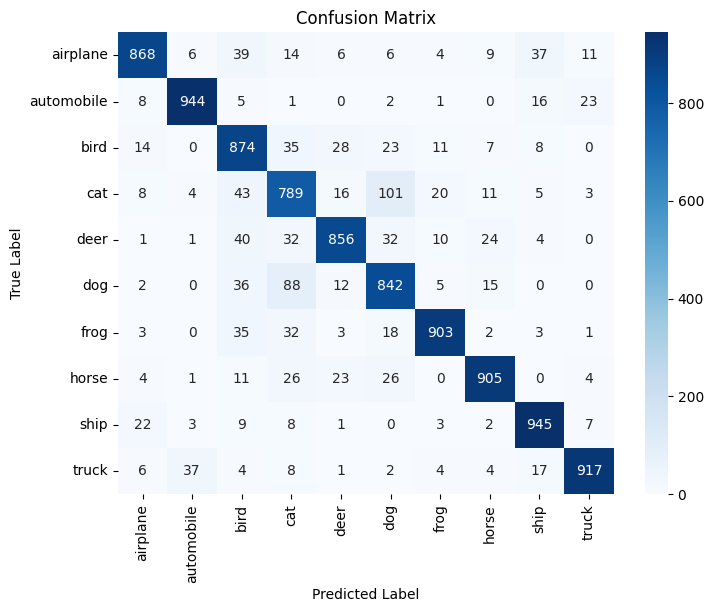

In [35]:
model.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')

conf_matrix = confusion_matrix(all_labels, all_preds)
roc_auc = roc_auc_score(all_labels, torch.nn.functional.one_hot(torch.tensor(all_preds), num_classes=10),multi_class='ovr')
#multiclass lai onevsrest approach

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=train_data.classes, yticklabels=train_data.classes)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
model.eval()  # Switch to evaluation mode
with torch.no_grad():  # Disable gradient calculations
    val_image, val_label = test_data[0]  # Use a test image for validation
    val_image = val_image.unsqueeze(0).to(device)
    val_label = torch.tensor([val_label], device=device)

    output = model(val_image)
    _, predicted = torch.max(output, 1)  # Get the class with highest probability
    print(f"Predicted: {predicted.item()}, Actual: {val_label.item()}")


Predicted: 6, Actual: 3


In [22]:
torch.save(model.state_dict(), '/content/model_checkpoint.pth')
torch.save(optimizer.state_dict(), '/content/optimizer_checkpoint.pth')
torch.save({'epoch': epoch, 'loss': avg_loss}, '/content/epoch_checkpoint.pth')



In [30]:

# Load the model and optimizer states
model.load_state_dict(torch.load('/content/drive/MyDrive/model_checkpoint.pth'))
optimizer.load_state_dict(torch.load('/content/drive/MyDrive/optimizer_checkpoint.pth'))

# Load the epoch and loss state
checkpoint = torch.load('/content/drive/MyDrive/epoch_checkpoint.pth')
start_epoch = checkpoint['epoch'] + 1  # Resume from next epoch

print(f"Resuming training from epoch {start_epoch}...")

Resuming training from epoch 52...


<ipython-input-30-3cdf4ebfd5f0>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/content/drive/MyDrive/model_checkpoint.pth'))
<ipython-in

In [31]:
for epoch in range(start_epoch, start_epoch + 50):
    model.train()
    print(f'Training epoch {epoch}..')
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights
        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    print(f"Loss: {avg_loss:.4f}")

    # Save the model state after each epoch
    torch.save(model.state_dict(), '/content/drive/MyDrive/model_checkpoint.pth')
    torch.save(optimizer.state_dict(), '/content/drive/MyDrive/optimizer_checkpoint.pth')
    torch.save({'epoch': epoch, 'loss': avg_loss}, '/content/drive/MyDrive/epoch_checkpoint.pth')

Training epoch 52..
Loss: 0.0729
Training epoch 53..
Loss: 0.0724
Training epoch 54..
Loss: 0.0734
Training epoch 55..
Loss: 0.0684
Training epoch 56..
Loss: 0.0716
Training epoch 57..
Loss: 0.0668
Training epoch 58..
Loss: 0.0640
Training epoch 59..
Loss: 0.0625
Training epoch 60..
Loss: 0.0641
Training epoch 61..
Loss: 0.0575
Training epoch 62..
Loss: 0.0634
Training epoch 63..
Loss: 0.0606
Training epoch 64..
Loss: 0.0566
Training epoch 65..
Loss: 0.0555
Training epoch 66..
Loss: 0.0565
Training epoch 67..
Loss: 0.0550
Training epoch 68..
Loss: 0.0521
Training epoch 69..
Loss: 0.0536
Training epoch 70..
Loss: 0.0507
Training epoch 71..
Loss: 0.0518
Training epoch 72..
Loss: 0.0480
Training epoch 73..
Loss: 0.0473
Training epoch 74..
Loss: 0.0497
Training epoch 75..
Loss: 0.0456
Training epoch 76..
Loss: 0.0470
Training epoch 77..
Loss: 0.0447
Training epoch 78..
Loss: 0.0469
Training epoch 79..
Loss: 0.0445
Training epoch 80..
Loss: 0.0441
Training epoch 81..
Loss: 0.0404
Training e

In [32]:
# Save the model state after each epoch
torch.save(model.state_dict(), '/content/drive/MyDrive/model_checkpoint.pth')
torch.save(optimizer.state_dict(), '/content/drive/MyDrive/optimizer_checkpoint.pth')
torch.save({'epoch': epoch, 'loss': avg_loss}, '/content/drive/MyDrive/epoch_checkpoint.pth')

In [51]:
cifar10_classes = [
    "Airplane", "Automobile", "Bird", "Cat", "Deer",
    "Dog", "Frog", "Horse", "Ship", "Truck"
]

In [52]:
#testing
new_transform = transforms.Compose([
  transforms.Resize((32,32)), #resize to 32 pixels
  transforms.ToTensor(),
  transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
])

def load_image(image_path):
  image = Image.open(image_path)
  image = new_transform(image)
  image = image.unsqueeze(0) #add batch dimension to be compatible
  return image.to(device)


print("Please upload the images you want to classify:")
uploaded_images = files.upload()
image_paths = list(uploaded_images.keys())

model.eval()

with torch.no_grad():
    for path in image_paths:
        image = load_image(path)  # Preprocess the image
        output = model(image)  # Forward pass through the model
        _, predicted = torch.max(output, 1)  # Get the class with the highest probability

        class_index = predicted.item()  # Convert prediction to scalar index
        class_name = cifar10_classes[class_index]  # Map index to class name

        print(f"The image '{path}' is classified as: {class_name}")

Please upload the images you want to classify:


Saving puff.jpg to puff (8).jpg
The image 'puff (8).jpg' is classified as: Dog
